# Machine Learning para el PFC

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc
import numpy as np

In [2]:
data = pd.read_csv('smoking_driking_dataset_Ver01.csv')
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [3]:
data["DRK_YN"]=data["DRK_YN"].replace("Y",1).replace("N",0)
data["sex"]=data["sex"].replace("Female",1).replace("Male",0)
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


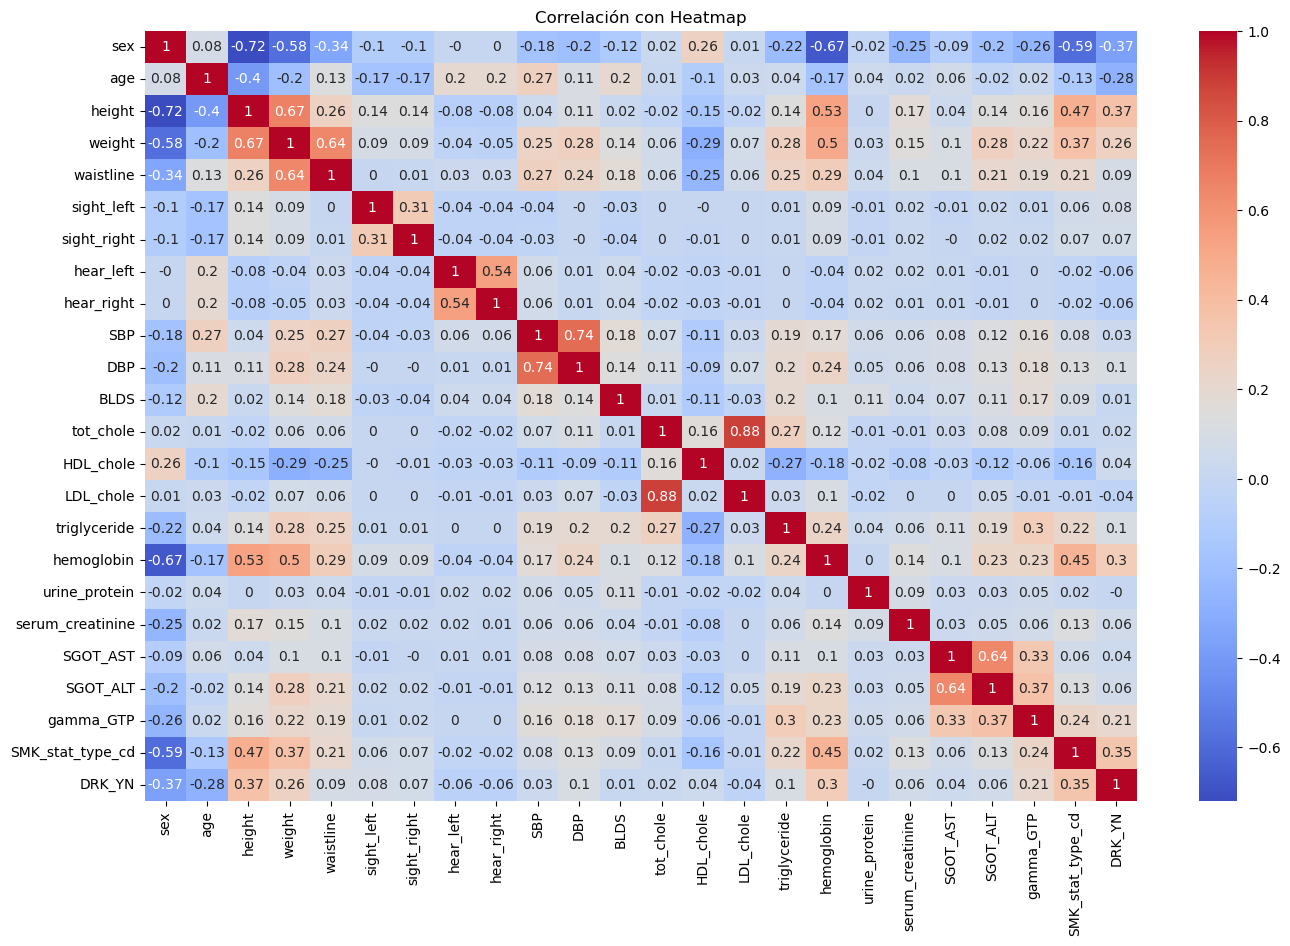

In [4]:
data_corr=data.corr().round(2)
plt.figure(figsize=(16, 10))   #siempre antes de poner la propia grafica
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.title("Correlación con Heatmap")
plt.show()

In [5]:
data["IMC"]=(data["weight"])/(data["height"]/100)**2
data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN,IMC
0,0,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1,25.951557
1,0,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0,24.691358
2,0,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0,27.548209
3,0,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0,26.122449
4,0,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0,22.038567


In [8]:
data_x=data.drop(labels="SMK_stat_type_cd",axis="columns")

In [10]:
data.shape

(991346, 25)

In [11]:
data_x.shape

(991346, 24)

## Calculamos el VIF

In [7]:
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [9]:
for i in data_x.columns:
    X=data_x.loc[:,data_x.columns !=i]
    y=data_x.loc[:,data_x.columns ==i]
    modelo_n=LinearRegression()
    modelo_n.fit(X,y)
    r_cuadrado=modelo_n.score(X,y)   #nos devuelve el valor del modelo (R**2)
    
    VIF=1/(1-r_cuadrado)
    print(VIF)

3.460097869405994
1.7453896967391793
48.3211914572934
133.69470339075082
1.99027918603952
1.1284849831726487
1.12734492136033
1.425943511406363
1.4230363706644404
2.483562950949961
2.3477597811733415
1.1356626962092693
8.379820492759011
1.5950037683921336
7.2744135596683535
2.0118430479492764
2.0315424677772076
1.023909364258148
1.0762857683495257
1.7719867828070626
1.9560806866850664
1.3601493756726493
1.3183349415350396
74.87899710276444


In [12]:
data_x=data_x.drop(labels=["height","LDL_chole"], axis="columns")

In [13]:
data_x.shape

(991346, 22)

## Estudiamos el modelo de predicción tomando como y la columna de fumadores

In [15]:
X=data_x
y=data.loc[:,"SMK_stat_type_cd"]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state= 10 # fijo una semilla para obtener un resultado particular cada vez y que no sea aleatorio
)

In [24]:
# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [25]:
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree classifier: {accuracy*100}')

Accuracy of the Decision Tree classifier: 69.6122854940949


## Teniendo en cuenta de que el accuracy es bajo, trabajamos con el PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
modelo = PCA(n_components= 22)

In [39]:
X = data_x
media = X.mean()
desvio = X.std()
X_estandar = (X - media)/ desvio

In [42]:
X_pca = modelo.fit_transform(X_estandar)

In [44]:
modelo.explained_variance_ratio_

array([0.19269889, 0.09612538, 0.07497304, 0.06699728, 0.06091906,
       0.05438173, 0.05271454, 0.05038899, 0.04529304, 0.04279913,
       0.03810325, 0.03372736, 0.03147437, 0.03042237, 0.02681981,
       0.02169918, 0.0210455 , 0.01651819, 0.01497048, 0.01389249,
       0.01075952, 0.0032764 ])

In [47]:
modelo.explained_variance_ratio_[:16].sum()

0.919537423237432

In [48]:
X_pca_tabla = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3", "PC4","PC5", "PC6", "PC7","PC8", "PC9", "PC10","PC11", "PC12", "PC13","PC14", "PC15", "PC16","PC17", "PC18", "PC19","PC20", "PC21", "PC22"])

In [52]:
X_finales = X_pca_tabla.iloc[:,:16]
X_finales.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,1.976471,1.494418,-0.657806,-0.437745,0.003467,0.572809,0.181965,0.706285,0.042347,-0.033274,-0.009924,-0.532742,-0.023421,0.198481,-0.049510,-0.425280
1,1.665654,0.693779,-0.608029,0.403989,0.034848,-0.409718,0.340352,0.235533,0.184119,0.538359,-0.106804,-1.134767,0.245809,0.866960,-1.121652,-0.223179
2,1.620218,0.888235,-0.118371,-1.000613,-1.667638,-0.512876,-1.241565,0.458699,-0.335555,0.042423,0.040296,-0.356531,0.400896,-0.269745,-1.104201,0.289594
3,2.292937,0.223155,-0.808704,0.581098,0.962832,-0.703686,-0.577157,0.865524,0.598982,1.091740,0.535896,-1.646798,-0.312801,-0.200269,-0.953124,0.938273
4,-0.179730,-0.403226,-0.619337,0.651972,0.804164,-0.121496,-0.687528,0.133380,-0.407256,0.421043,0.107888,-0.670609,0.265379,-0.183276,-0.544297,0.169571


## Volvemos a hacer un modelo con las X finales y la y

In [53]:
X=X_finales
y=data.loc[:,"SMK_stat_type_cd"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state= 10 # fijo una semilla para obtener un resultado particular cada vez y que no sea aleatorio
)
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree classifier: {accuracy*100}')

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state= 10 # fijo una semilla para obtener un resultado particular cada vez y que no sea aleatorio
)

In [55]:
# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [56]:
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree classifier: {accuracy*100}')

Accuracy of the Decision Tree classifier: 68.1064570665397


## Y ahora trabajamos con la tabla original con todas las columnas

In [57]:
data_smk=data.drop(labels="SMK_stat_type_cd",axis="columns")

In [58]:
X=data_smk
media = X.mean()
desvio = X.std()
X_estandar = (X - media)/ desvio

In [61]:
X_pca = modelo.fit_transform(X_estandar)

In [62]:
modelo.explained_variance_ratio_

array([0.19103329, 0.10019707, 0.08061008, 0.06871542, 0.06110287,
       0.05521454, 0.05062259, 0.04655488, 0.042211  , 0.04073042,
       0.03506757, 0.03379764, 0.02885252, 0.02800004, 0.02618509,
       0.02354954, 0.01929818, 0.01912812, 0.01505395, 0.01364247,
       0.00990282, 0.00780845])

In [63]:
modelo.explained_variance_ratio_[:16].sum()

0.9124445530384617

In [64]:
X_pca_tabla = pd.DataFrame(X_pca, columns=["PC1", "PC2", "PC3", "PC4","PC5", "PC6", "PC7","PC8", "PC9", "PC10","PC11", "PC12", "PC13","PC14", "PC15", "PC16","PC17", "PC18", "PC19","PC20", "PC21", "PC22"])

In [65]:
X_finales = X_pca_tabla.iloc[:,:16]
X_finales.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,2.300049,-1.351253,0.152340,-0.494453,0.208476,-0.097133,0.424122,0.536951,0.218449,-0.115543,-0.074538,-0.391508,-0.008289,0.025178,-0.421030,-0.197773
1,2.297830,-0.840072,1.119739,-0.895679,0.111408,-0.176345,0.026832,0.389491,0.509695,-0.428874,-0.400683,-1.000497,0.235841,1.049325,1.180351,-0.586011
2,1.633926,-0.935737,-1.833375,0.576686,-0.425841,-1.362303,-0.913686,0.084439,0.257299,-0.565983,-0.074349,-0.389995,0.407374,-0.234142,0.792819,-0.436419
3,2.614197,-0.304145,0.022906,-0.887127,-0.252537,0.994052,-0.789810,0.738430,1.224130,-0.650333,0.338523,-0.994070,-0.300881,-0.026377,1.838664,0.770176
4,-0.088281,0.186052,0.048717,-0.759037,-0.298404,1.018633,-0.286697,-0.018312,0.156305,-0.767688,-0.101772,-0.704162,0.265478,-0.057535,0.793235,-0.163709


In [66]:
X=X_finales
y=data.loc[:,"SMK_stat_type_cd"]

In [67]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state= 10 # fijo una semilla para obtener un resultado particular cada vez y que no sea aleatorio
)

In [68]:
# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [69]:
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Decision Tree classifier: {accuracy*100}')

Accuracy of the Decision Tree classifier: 68.04593341591449
